In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [25]:
df=pd.read_csv("Copper_Set.csv")

In [26]:
len(df['product_ref'].unique())

33

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [28]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [29]:
import re
val=[]
for i in df['material_ref'].values:
    if re.search(r'[00000]+[0-9]+', str(i)):
        val.append(None)
    else:
        val.append(i)
    
df['material_ref']=val

In [30]:
df.isnull().sum()

id                    2
item_date             1
quantity tons         0
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     151906
product_ref           0
delivery date         1
selling_price         1
dtype: int64

In [31]:
 df=df.drop(['id'],axis=1)

In [32]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['product_ref']=df['product_ref'].astype(str)

In [33]:
df.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,None,1668701718,2021-04-01,1047.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181670 non-null  object 
 1   quantity tons  181672 non-null  float64
 2   customer       181672 non-null  float64
 3   country        181645 non-null  float64
 4   status         181671 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181649 non-null  float64
 7   thickness      181672 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   29767 non-null   object 
 10  product_ref    181673 non-null  object 
 11  delivery date  181670 non-null  object 
 12  selling_price  181672 non-null  float64
dtypes: float64(7), object(6)
memory usage: 18.0+ MB


In [35]:
df.isnull().sum()

item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     151906
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [36]:
df['selling_price']=df['selling_price'].fillna(value=645)
df['status']=df['status'].fillna(value='Won')
df['country']=df['country'].fillna(value=27)
df['application']=df['application'].fillna(value=10)
cust_null=(df[df['customer'].isnull()])
#same_cust=df[(df['status']=='Won') & (df['item type']=='W') & (df['application']==10)
#             & (df['country']==39) & (df['width']==1270)]
#print(same_cust['customer'].mode())
df['customer']=df['customer'].fillna(value=30353798.0)
#date=df[df['item_date'].isnull()]
df['item_date']=df['item_date'].fillna(method='pad')
#delivery_null=df[df['delivery date'].isnull()]
#near_data=df.iloc[104757:104766,:]
df['delivery date']=df['delivery date'].fillna(method='bfill')
thick_null=df[df['thickness'].isnull()]
#near_val=df.iloc[104890:104899,:]
df['thickness']=df['thickness'].fillna(value=0.7)

In [37]:
index=df[df['quantity tons'].isnull()]
df.iloc[173080:173090,:]
#index no.173082 is matching with this row
df['quantity tons']=df['quantity tons'].fillna(value=403.619083)

df.isnull().sum()

item_date             0
quantity tons         0
customer              0
country               0
status                0
item type             0
application           0
thickness             0
width                 0
material_ref     151906
product_ref           0
delivery date         0
selling_price         0
dtype: int64

In [38]:
val=df['material_ref'].mode()
print(val)
df['material_ref']=df['material_ref'].fillna(value='DX51D+Z')
df.isnull().sum()

0    DX51D+Z
Name: material_ref, dtype: object


item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [39]:
copy_df=df.copy()

In [40]:
duration=[]
for i in range(181673):
    order_date=df['delivery date'].loc[i]-df['item_date'].loc[i]
    duration.append(order_date.days)
copy_df['duration']=duration
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      181673 non-null  object 
 1   quantity tons  181673 non-null  float64
 2   customer       181673 non-null  float64
 3   country        181673 non-null  float64
 4   status         181673 non-null  object 
 5   item type      181673 non-null  object 
 6   application    181673 non-null  float64
 7   thickness      181673 non-null  float64
 8   width          181673 non-null  float64
 9   material_ref   181673 non-null  object 
 10  product_ref    181673 non-null  object 
 11  delivery date  181673 non-null  object 
 12  selling_price  181673 non-null  float64
 13  duration       181673 non-null  int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


In [41]:
copy_df=copy_df.drop(['item_date'],axis=1)
copy_df=copy_df.drop(['delivery date'],axis=1)

In [42]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181673 non-null  float64
 1   customer       181673 non-null  float64
 2   country        181673 non-null  float64
 3   status         181673 non-null  object 
 4   item type      181673 non-null  object 
 5   application    181673 non-null  float64
 6   thickness      181673 non-null  float64
 7   width          181673 non-null  float64
 8   material_ref   181673 non-null  object 
 9   product_ref    181673 non-null  object 
 10  selling_price  181673 non-null  float64
 11  duration       181673 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 16.6+ MB


[Text(0, 0, 'quantity tons'),
 Text(1, 0, 'customer'),
 Text(2, 0, 'country'),
 Text(3, 0, 'application'),
 Text(4, 0, 'thickness'),
 Text(5, 0, 'width'),
 Text(6, 0, 'selling_price'),
 Text(7, 0, 'duration')]

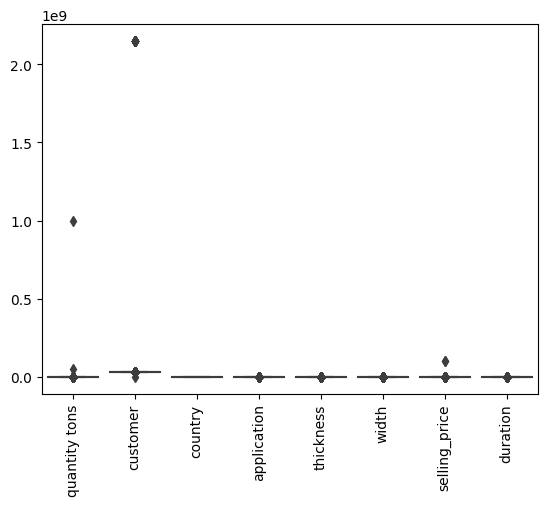

In [43]:
#sns.histplot(data=df['selling_price'].loc[0:1000])
graph=sns.boxplot(data=copy_df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

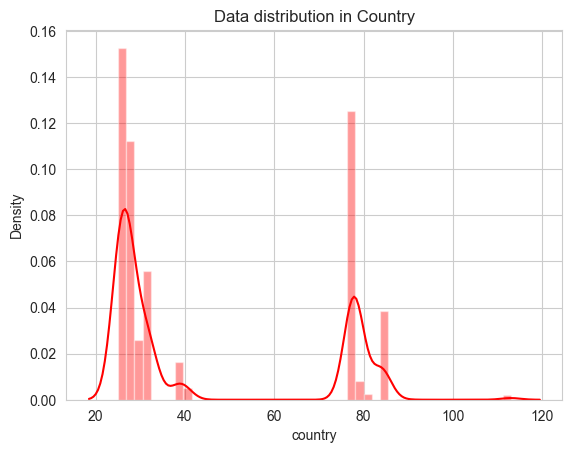

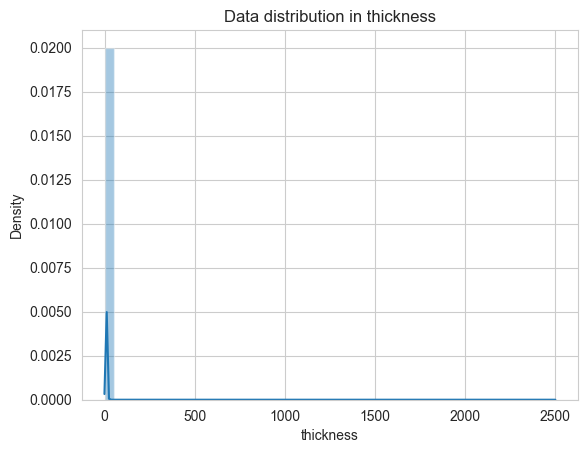

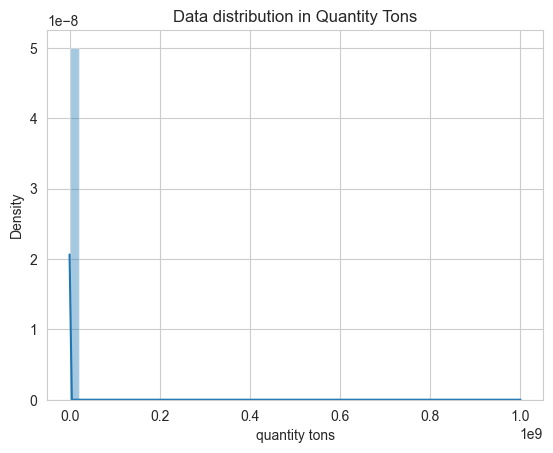

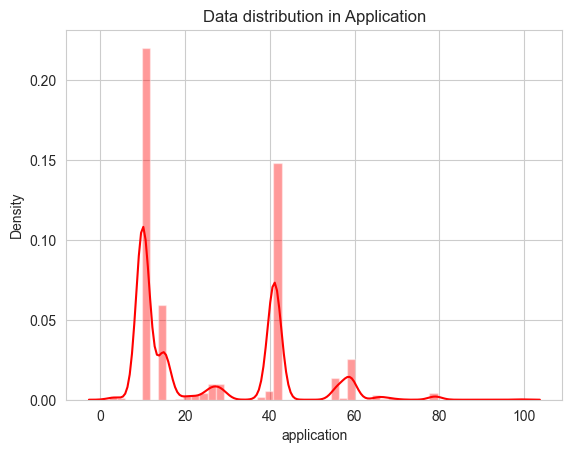

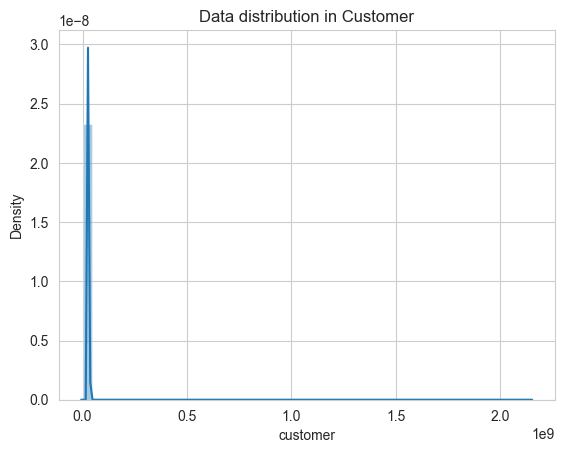

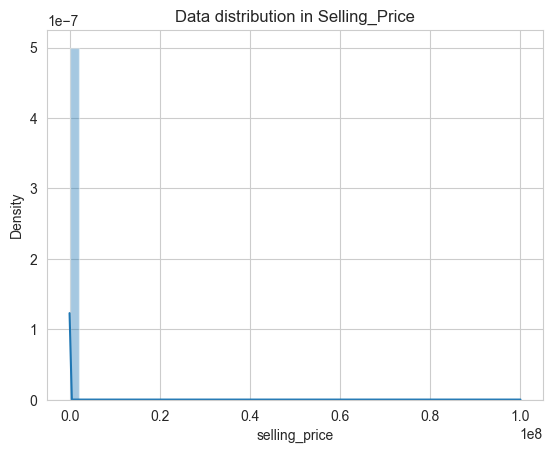

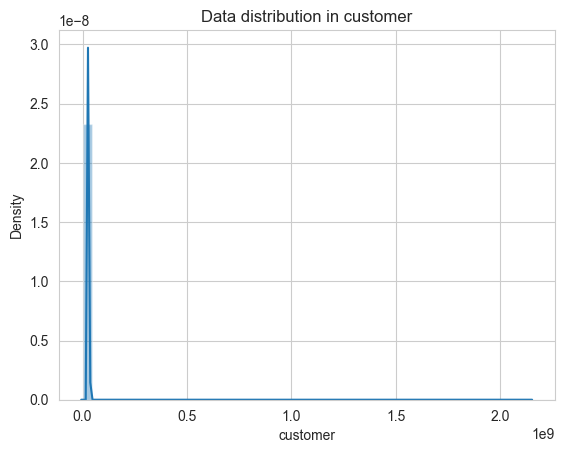

In [44]:
sns.set_style('whitegrid')
sns.distplot(copy_df['country'],color='red').set_title("Data distribution in Country")
plt.show()

sns.distplot(copy_df['thickness']).set_title("Data distribution in thickness")
plt.show()

sns.distplot(copy_df['quantity tons']).set_title("Data distribution in Quantity Tons")
plt.show()

sns.distplot(copy_df['application'],color='red').set_title("Data distribution in Application")
plt.show()

sns.distplot(copy_df['customer']).set_title("Data distribution in Customer")
plt.show()

sns.distplot(copy_df['selling_price']).set_title("Data distribution in Selling_Price")
plt.show()

sns.distplot(copy_df['customer']).set_title("Data distribution in customer")
plt.show()


# Outlier detection and Capping - Using IQR

# selling price

In [45]:
copy_df.describe()

,quantity tons,customer,country,application,thickness,width,selling_price,duration
count,1.816730e+05,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,181673.000000
mean,5.874896e+03,3.051221e+07,44.890264,25.613746,2.564817,1295.286724,1.918028e+03,59.990863
std,2.349075e+06,2.433375e+07,24.403344,17.753909,6.572304,261.631754,3.317947e+05,46.812768
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,-1.160000e+03,-689.000000
25%,1.097037e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.690000e+02,28.000000
50%,3.036499e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,8.120000e+02,59.000000
75%,6.716130e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,9.530000e+02,97.000000
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.000010e+08,448.000000


In [70]:
def outlier_detection(data):
    percentile_q1=copy_df[data].quantile(0.25)
    percentile_q3=copy_df[data].quantile(0.75)
    
    iqr=percentile_q3-percentile_q1
    
    upper_limit=percentile_q3+1.5*iqr
    lower_limit=percentile_q1-1.5*iqr
    return upper_limit,lower_limit,iqr

In [71]:
sp_upper_limit,sp_lower_limt,sp_iqr=outlier_detection('selling_price')
sp_upper_limit,sp_lower_limt,sp_iqr

(1379.0, 243.0, 284.0)

In [72]:
copy_df[(copy_df['selling_price']>sp_upper_limit) | (copy_df['selling_price']<sp_lower_limt)]

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,duration,log_quantity_tons,thickness_log


In [49]:
def capping(column,upper_limit,lower_limit):
    new_val=[]
    for i in copy_df[column].values:
        if i > upper_limit:
            new_val.append(upper_limit)
        elif i<lower_limit:
            new_val.append(lower_limit)
        else:
            new_val.append(i)
    return new_val
        

In [50]:
copy_df['selling_price']=capping('selling_price',sp_upper_limit,sp_lower_limt)

copy_df[(copy_df['selling_price']>sp_upper_limit) | (copy_df['selling_price']<sp_lower_limt)]

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,duration


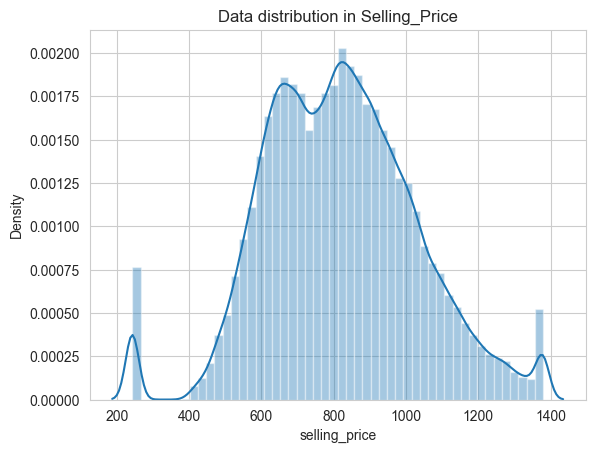

In [51]:
sns.distplot(copy_df['selling_price']).set_title("Data distribution in Selling_Price")
plt.show()

# Quantity Tons

In [52]:
quantity_upper_limit,quantity_lower_limit,qt_iqr=outlier_detection('quantity tons')
quantity_upper_limit,quantity_lower_limit,qt_iqr

(151.44767755499998, -73.31600848499998, 56.190921509999995)

In [53]:

copy_df[(copy_df['quantity tons']>quantity_upper_limit) | (copy_df['quantity tons']<quantity_lower_limit)]

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,duration
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,DX51D+Z,1668701718,1047.00,0
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,DX51D+Z,628377,644.33,-90
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,768.00,-90
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,577.00,-31
5,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,DX51D+Z,1668701718,983.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
181663,1203.157826,30200854.0,25.0,Won,W,41.0,0.72,1240.0,DX51D+Z,164141591,622.00,-1
181664,603.114940,30200854.0,25.0,Won,W,41.0,0.85,1240.0,DX51D+Z,164141591,609.00,-1
181669,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,DX51D+Z,164141591,589.00,-1
181671,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,DX51D+Z,164141591,601.00,-1


In [54]:
copy_df['quantity tons']=capping('quantity tons',quantity_upper_limit,quantity_lower_limit)

copy_df[(copy_df['quantity tons']>quantity_upper_limit) | (copy_df['quantity tons']<quantity_lower_limit)]

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,duration


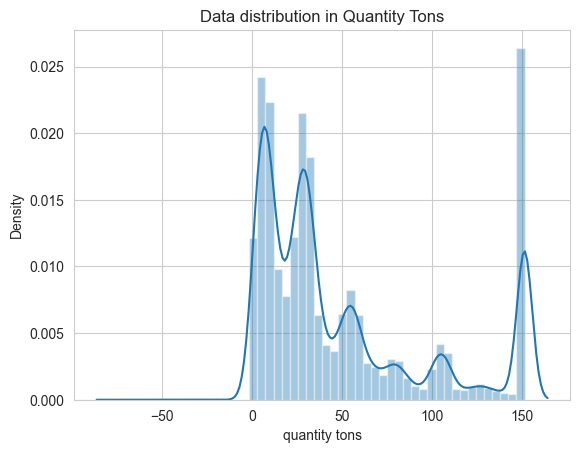

In [55]:
sns.distplot(copy_df['quantity tons']).set_title("Data distribution in Quantity Tons")
plt.show()

# Thickness

In [56]:
thick_upper_limit,thick_lower_limit,thick_iqr=outlier_detection('thickness')
thick_upper_limit,thick_lower_limit,thick_iqr

(6.449999999999999, -2.75, 2.3)

In [57]:

copy_df[(copy_df['thickness']>thick_upper_limit) |(copy_df['thickness']<thick_lower_limit)]


,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,duration
41,59.907355,30202938.0,25.0,Won,W,41.0,2500.00,1260.0,DX51D+Z,1670798778,243.0,0
93,33.508328,30394817.0,78.0,Won,S,10.0,13.00,1640.0,DX51D+Z,640665,829.0,61
109,31.632944,30394817.0,78.0,Won,S,10.0,7.00,900.0,DX51D+Z,640665,1038.0,91
113,26.658500,30394817.0,78.0,Won,S,10.0,10.00,900.0,DX51D+Z,640665,1047.0,91
117,33.304158,30394817.0,78.0,Won,S,10.0,12.00,900.0,DX51D+Z,640665,1049.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...
181363,31.100455,30201370.0,84.0,Won,S,15.0,8.00,1500.0,DX51D+Z,640405,581.0,61
181365,30.939706,30201370.0,84.0,Won,S,15.0,10.00,1500.0,DX51D+Z,640405,583.0,61
181367,27.349233,30201370.0,84.0,Won,S,15.0,12.00,1500.0,DX51D+Z,1671863738,636.0,61
181381,33.978646,30201370.0,84.0,Won,S,15.0,8.00,1500.0,DX51D+Z,1671863738,627.0,61


In [58]:
copy_df['thickness']=capping('thickness',thick_upper_limit,thick_lower_limit)

copy_df[(copy_df['thickness']>thick_upper_limit) |(copy_df['thickness']<thick_lower_limit)]

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,duration


<Axes: xlabel='thickness', ylabel='Density'>

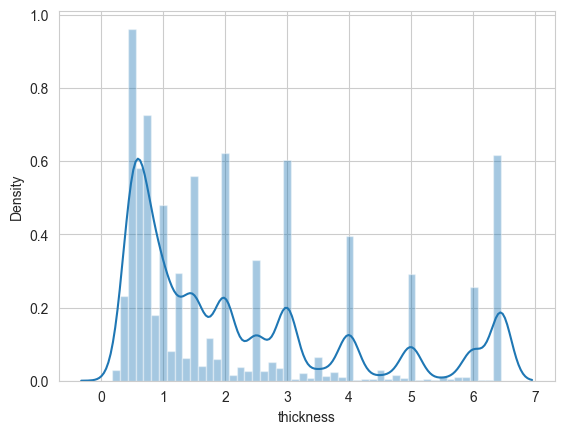

In [59]:
sns.distplot(copy_df['thickness'])

In [60]:
customer_upper_limit,customer_lower_limt,cust_iqr=outlier_detection('customer')
customer_upper_limit,customer_lower_limt,cust_iqr

(30405714.0, 30071586.0, 83532.0)

In [61]:
copy_df[(copy_df['customer']>customer_upper_limit)| (copy_df['customer']<customer_lower_limt)]

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,duration
36,29.010937,30406347.0,32.0,Won,S,15.0,3.0,1000.0,DX51D+Z,1671863738,1037.0,91
407,112.324585,30407192.0,32.0,Lost,W,20.0,1.0,1013.0,77532771AEGF40CSA,611993,1366.0,91
409,111.750484,30407192.0,32.0,Lost,W,20.0,0.5,1005.0,DX51D+Z,611993,1379.0,91
411,110.519504,30407192.0,32.0,Lost,W,20.0,0.5,1005.0,DX51D+Z,611993,1379.0,91
413,108.635334,30407192.0,32.0,Lost,W,20.0,0.6,1175.0,DX51D+Z,611993,1379.0,91
...,...,...,...,...,...,...,...,...,...,...,...,...
181335,28.544476,30406632.0,84.0,Lost,S,29.0,1.0,1250.0,DX51D+Z,1693867550,680.0,30
181337,31.911284,30406632.0,84.0,Lost,S,29.0,1.0,1500.0,DX51D+Z,1693867550,679.0,30
181339,51.506718,30406632.0,84.0,Lost,S,29.0,1.5,1250.0,DX51D+Z,1693867550,668.0,30
181341,53.386323,30406632.0,84.0,Lost,S,29.0,1.5,1500.0,DX51D+Z,1693867550,668.0,30


In [62]:
copy_df['customer']=capping('customer',customer_upper_limit,customer_lower_limt)
copy_df[(copy_df['customer']>customer_upper_limit)| (copy_df['customer']<customer_lower_limt)]

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,selling_price,duration


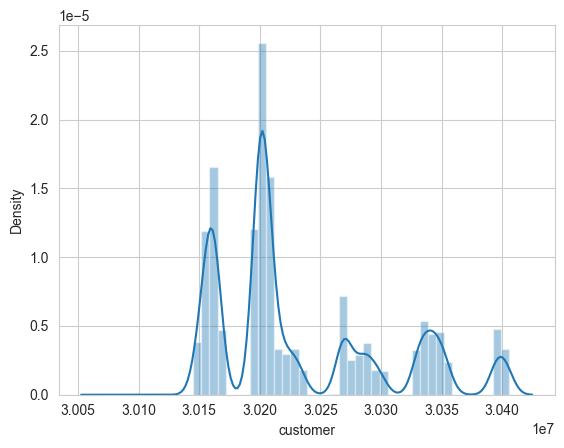

In [63]:
sns.distplot(copy_df['customer'])
plt.show()

In [67]:
from sklearn.preprocessing import LabelEncoder
encode_col=['status','item type','material_ref','product_ref']
for col in encode_col:
    le=LabelEncoder()
    copy_df[col]=le.fit_transform(copy_df[col])
print(copy_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   quantity tons      181673 non-null  float64
 1   customer           181673 non-null  float64
 2   country            181673 non-null  float64
 3   status             181673 non-null  int64  
 4   item type          181673 non-null  int64  
 5   application        181673 non-null  float64
 6   thickness          181673 non-null  float64
 7   width              181673 non-null  float64
 8   material_ref       181673 non-null  int32  
 9   product_ref        181673 non-null  int32  
 10  selling_price      181673 non-null  float64
 11  duration           181673 non-null  int64  
 12  log_quantity_tons  181669 non-null  float64
dtypes: float64(8), int32(2), int64(3)
memory usage: 16.6 MB
None


In [68]:
from scipy.stats import skew
for col in copy_df:
    print(col)
    print(skew(copy_df[col]))

quantity tons
1.1216444674936212
customer
0.9045949238280452
country
0.7538309966886313
status
-0.8020898877791031
item type
-0.4875330421068981
application
0.7245486374533386
thickness
1.060934160319693
width
0.37459367901082125
material_ref
2.9347547781241206
product_ref
-0.5616151290225287
selling_price
0.1365569035784187
duration
-0.43225919082709713
log_quantity_tons
nan


<Axes: xlabel='thickness_log', ylabel='Density'>

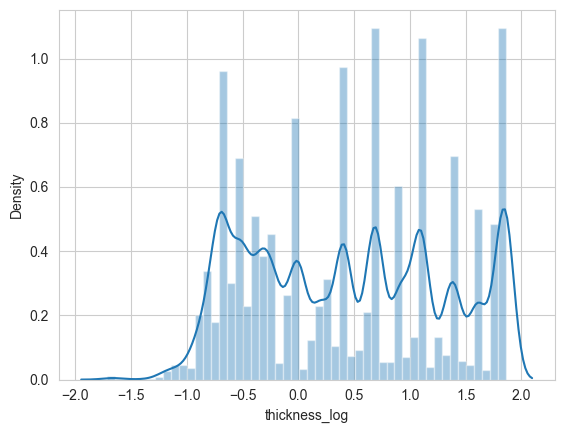

In [69]:
copy_df['thickness_log']=np.log(copy_df['thickness'])
sns.distplot(copy_df['thickness_log'])